In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/linear_regression_test.csv')

Mounted at /content/drive


In [4]:
df_test_x = df_test.iloc[:,1:]
df_test_x.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,141.763723,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,39.500793,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,27.740454,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,9.448577,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,14.580324,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917


In [5]:
df_train_x = df_train.iloc[:,1:-1]
df_train_x.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,32.708495,...,-16.592030,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197
1,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,3.507057,...,-22.893133,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894
2,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,66.893460,...,-2.406405,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334
3,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,7.199201,...,-23.511275,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027
4,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,58.730086,...,-22.131232,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157


In [6]:

df_train_y = df_train.iloc[:,-1]
df_train_y = df_train_y.values.reshape(df_train_y.shape[0],1)
print(df_train_y.shape)

(48000, 1)


In [7]:
df_train_x1 = (df_train_x - df_train_x.mean())/df_train_x.std() #this is called z-score normalization
x = np.hstack((np.ones((df_train_x1.shape[0],1)),df_train_x1)) # here the feature matrix got a column of ones added to it. So that in matrix multiply constant is already added
print(x.shape)


(48000, 26)


In [8]:
y = df_train_y
print(y.shape)

(48000, 1)


In [9]:
i = 25000
a = 0.001
m = x.shape[0]
w = np.zeros((x.shape[1],1))
print (w.shape)

(26, 1)


In [10]:
def grad(x,y,w,a,i):
  j_hist = []
  for i in range(i): #i could also write for bla in range(i)
      y_prediction = np.dot(x,w)
      dj_dw = -(2/m)*np.dot(x.T,(y - y_prediction))
      w = w - a*dj_dw
      j = np.mean((y - y_prediction)**2)
      j_hist.append(j)
  return w, j_hist, y_prediction


In [11]:
 w, j_hist, y_prediction = grad(x,y,w,a,i)

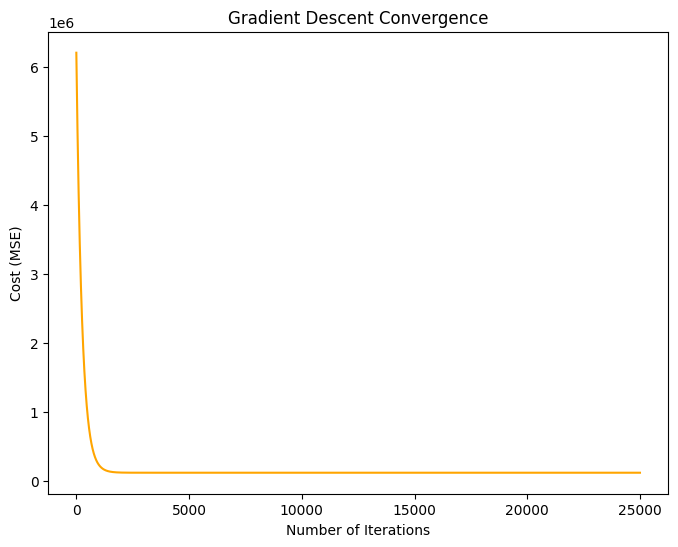

In [12]:

plt.figure(figsize=(8, 6))
plt.plot(range(i), j_hist, label='Cost (MSE)', color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.show()


In [13]:
df_test_x = (df_test_x - df_train_x.mean())/df_train_x.std() #I am using train mean and train standard deviation as otherwise the model may face a data leakage issue
x_tst = np.hstack((np.ones((df_test_x.shape[0],1)),df_test_x))
print(x_tst.shape)

(12000, 26)


In [14]:
y_test_prediction = np.dot(x_tst,w)
print(y_test_prediction.shape)

(12000, 1)


In [18]:
Target_values = pd.DataFrame(y_test_prediction, columns=["Predicted Target Values"])
Target_values.to_csv('linear_regression_test_predictions.csv', index=False)
print(Target_values.head())
print(os.getcwd())
files.download('/content/linear_regression_test_predictions.csv')

   Predicted Target Values
0              1067.956662
1              4496.891013
2              4051.356081
3             -1318.555659
4               745.422103
/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
print(j_hist[-1]) #final cost value or MSE value

116054.8004895628
